In [99]:
%matplotlib inline
from matplotlib import pyplot as plt
import caffe
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [5]:
net = caffe.Net('./segnet_pascal.prototxt',
                './segnet_pascal.caffemodel',
                caffe.TEST)

input_shape = net.blobs['data'].data.shape

caffe.set_mode_cpu()

In [106]:
pre = '.png'
frame0 = cv2.imread('./Desktop/dataset_blotches/test/image'+str(10)+pre)
frame0 = cv2.resize(frame0, (input_shape[3],input_shape[2]))
input_image0 = frame0.transpose((2,0,1))
input_image0 = np.asarray([input_image0])

frame1 = cv2.imread('./Desktop/dataset_blotches/test/image'+str(60)+pre)
frame1 = cv2.resize(frame1, (input_shape[3],input_shape[2]))
input_image1 = frame1.transpose((2,0,1))
input_image1 = np.asarray([input_image1])

frame2 = cv2.imread('./Desktop/dataset_blotches/test/image'+str(110)+pre)
frame2 = cv2.resize(frame2, (input_shape[3],input_shape[2]))
input_image2 = frame2.transpose((2,0,1))
input_image2 = np.asarray([input_image2])

frame3 = cv2.imread('./Desktop/dataset_blotches/test/image'+str(162)+pre)
frame3 = cv2.resize(frame3, (input_shape[3],input_shape[2]))
input_image3 = frame3.transpose((2,0,1))
input_image3 = np.asarray([input_image3])

# SegNet Encoder Decoder forward pass
net.blobs['data'].data[0,...] = input_image0
net.blobs['data'].data[1,...] = input_image1
net.blobs['data'].data[2,...] = input_image2
net.blobs['data'].data[3,...] = input_image3
net.forward()

# CodeBook gneration
desc0 = net.blobs['conv1_2_D'].data[3,...]
desc1 = net.blobs['conv1_2_D'].data[1,...]
desc2 = net.blobs['conv1_2_D'].data[2,...]
desc3 = net.blobs['conv1_2_D'].data[3,...]

In [123]:
#code0 = extractFeatures(desc0)
#print code0
#code1 = extractFeatures(desc1)
#print code1
#code2 = extractFeatures(desc2)
#print code2
extractFeatures(desc0)
extractFeatures(desc0)
extractFeatures(desc0)
#print code3

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 6 6 6 6 3 6 0 0 6 6 6 0 6 6
 0 0 0 6 6 6 6 0 0 0 0 0 6 6 0 0 0 6 6 6 0 0 0 0 0 0 6 6 0 0 0 6 6 6 0 0 0
 0 5 5 5 5 5 5 0 0 6 6 0 6 0 6 0 6 6 6 6 0 0 6 6 6 0 0 0 5 5 5 5 5 5 5 5 5
 3 6 0 0 6 6 6 6 0 6 6 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 3 0 0 5 6 6 6 6 6
 6 6 6 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 1 1 6 5 5 5 6 6 6 6 0 3 3 3 6 5 5 5 0
 5 5 5 5 5 5 5 5 5 1 1 6 5 5 5 6 6 6 0 5 3 1 1 3 4 4 4 5 5 5 5 5 1 3 5 1 1
 1 1 5 5 5 5 6 6 6 6 1 1 1 1 1 4 4 4 5 5 5 5 1 1 3 3 1 3 3 3 1 1 1 1 1 6 6
 1 1 1 1 1 4 4 7 7 5 3 3 1 1 3 6 6 6 6 6 3 1 1 1 1 1 3 3 1 1 1 1 1 7 7 7 7
 4 3 6 3 3 3 6 6 6 6 6 3 1 1 1 1 1 1 3 1 1 1 1 1 7 2 7 7 1 6 6 3 3 3 3 3 3
 6 3 3 1 1 1 1 1 1 1 1 1 1 1 4 7 2 7 4 3 6 6 6 3 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 1 1 1 4 7 2 7 3 3 6 6 6 6 3 3 3 3 3 6 3 3 3 3 1 1 1 1 1 1 1 5 4 7 2 7
 5 6 6 6 0 6 6 3 3 3 0 6 6 3 3 3 1 1 1 5 1 1 1 5 4 7 2 7 4 3 6 6 0 0 6 3 3
 6 6 6 6 3 3 3 1 1 1 1 1 1 1 5 7 7 7 2 7 3 6 6 0 0 0 6 6 6 0 6 6 3 3 3 3 1
 1 1 1 1 5 5 7 7 7 2 7 3 

In [105]:
print code0
print code3

None
None


# Loading Test image

In [86]:
kk = 960
pre = '.jpg'
# Current frame
frame = cv2.imread('./Desktop/dataset_blotches/test/image'+str(kk)+pre)
frame = cv2.resize(frame, (input_shape[3],input_shape[2]))
input_image = frame.transpose((2,0,1))
input_image = np.asarray([input_image])

neTest = caffe.Net('./segnet_pascal_test.prototxt',
                './segnet_pascal.caffemodel',
                caffe.TEST)

caffe.set_mode_cpu()

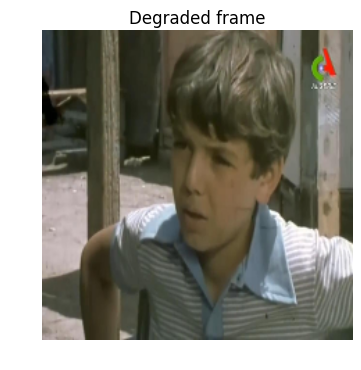

In [87]:
ax = plt.subplot("111")
ax.set_title("Degraded frame")
plt.axis('off')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [88]:
#  Encoder Decoder
neTest.blobs['data'].data[0,...] = input_image
neTest.forward()

{'argmax': array([[[[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ..., 
          [  0.,   0.,   0., ...,  15.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]]]], dtype=float32)}

(224, 224, 1)


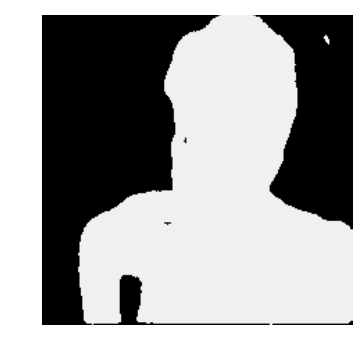

In [89]:
map_cr = neTest.blobs['argmax'].data[0,...]
map_cr = map_cr.transpose((1,2,0))
print map_cr.shape
# show images<w
map_B = np.reshape(map_cr, (224,224))
plt.axis('off')
mplt = plt.imshow(map_B,'gray')

In [71]:
desc = neTest.blobs['conv1_2_D'].data[0,...]
print desc.shape

(64, 224, 224)


[ 0.02423469  0.00892857  0.0127551   0.00255102  0.00255102  0.07780612
  0.01147959  0.02295918  0.00382653  0.00892857  0.00382653  0.01020408
  0.06887755  0.49362245  0.00510204  0.00255102  0.01020408  0.01020408
  0.01785714  0.00510204  0.01147959  0.01020408  0.01658163  0.03061224
  0.03188776  0.00382653  0.01147959  0.00637755  0.00382653  0.02678571
  0.01147959  0.03188776]
[ 0.00892857  0.00255102  0.00510204  0.00382653  0.00255102  0.22193878
  0.00892857  0.01913265  0.00255102  0.00255102  0.00510204  0.0369898
  0.20408163  0.00255102  0.01403061  0.01530612  0.00510204  0.00255102
  0.00382653  0.00765306  0.00382653  0.00382653  0.0255102   0.15178571
  0.03188776  0.11734694  0.0127551   0.00255102  0.03571429  0.0127551
  0.00765306  0.01913265]


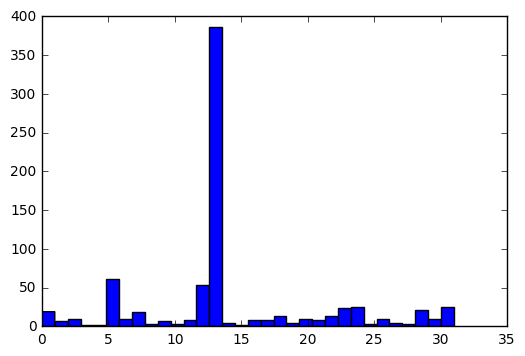

In [72]:
code = extractFeatures(desc)
print code/(28*28)
print code3/(28*28)

In [41]:
distances = np.zeros((4))
distances[0] = distance_measure(code, code0)
distances[1] = distance_measure(code, code1)
distances[2] = distance_measure(code, code2)
distances[3] = distance_measure(code, code3)

print min(distances)
print distances[3]

181518.0
262488.0


In [122]:
def extractFeatures(d):
    d = d.transpose((1,2,0)) 
    loc_d = np.zeros((28*28,64)) 
    l = 0
    for i in range(28):
        for j in range(28):
            f = d[i*8:(i+1)*8,j*8:(j+1)*8,:]        
            for k in range(64):
                loc_d[l,k] = np.mean(f[:,:,k])
            l = l+1
    loc_d = np.float32(loc_d)
    #print loc_d[100,:]
    
    # Clustering
    K = 8
    #criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 500, 0.05)
    #flags = cv2.KMEANS_PP_CENTERS
    #compactness,labels,centers = cv2.kmeans(loc_d,K,criteria,500,0)
    clt = KMeans(n_clusters = K)
    clt.fit(loc_d)
    clt.predict(loc_d)
    #cluster_centers_
    #clt.pr
    print clt.labels_

    # Hist 
    #h = plt.hist(labels.ravel(),32,[0,31]); 
    
    #print labels.ravel()
    #return h[0]
    

In [8]:
def distance_measure(D, D1):
    sim = np.sum(np.power(D-D1,2))
    return(sim)

(-0.5, 223.5, 223.5, -0.5)

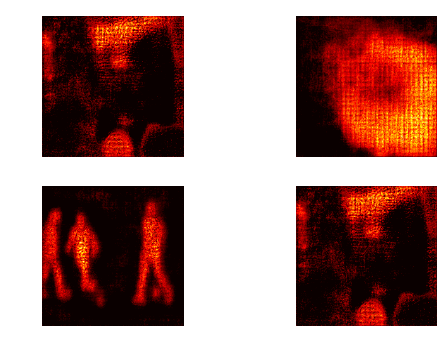

In [42]:
f, axarr = plt.subplots(2, 2)
axarr[0,0].imshow(desc0[60], 'hot')
axarr[0,0].axis('off')
axarr[0,1].imshow(desc1[60], 'hot')
axarr[0,1].axis('off')
axarr[1,0].imshow(desc2[60], 'hot')
axarr[1,0].axis('off')
axarr[1,1].imshow(desc3[60], 'hot')
axarr[1,1].axis('off')
